In [1]:
import numpy as np
from sympy.physics.wigner import wigner_3j,wigner_6j
import sympy as sy
from numpy import linalg as LA
from IPython.display import Latex,display
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set_palette('terrain')
from Energy_Levels import MoleculeLevels
np.set_printoptions(precision=5, suppress=True)
import time
from matplotlib.colors import TwoSlopeNorm

In [2]:
import json
import ujson as uj

def get_json_data(file_path,numpy=False,ujson=True):
    if '.json' not in file_path:
        file_path+='.json'
    with open(file_path, 'r') as f:
        if ujson:
            data = uj.load(f)
        else:
            data = json.load(f)
    if numpy:
        data = np.array(data)
    return data

def save_json_data(data,file_path,ujson=True):
    if type(data) is np.ndarray:
        data_save = data.tolist()
    else:
        data_save=data
    if '.json' not in file_path:
        file_path+='.json'
    with open(file_path,'w') as f:
        if ujson:
            uj.dump(data_save,f)
        else:
            json.dump(data_save,f)
    print('Data saved to', file_path)

In [34]:
Bstep = 0.01/2
Bz = np.arange(0.0,10+Bstep,Bstep)
# Bz[0]=1e-2
Estep = 0.1/2
Ez = np.arange(0.0,100+Estep,Estep)
print(len(Ez),len(Bz))
print(len(Ez)*len(Bz))

2001 2002
4006002


In [35]:
state_dict = {}
eval_dict = {}
evec_dict = {}
PTV_dict = {}
N=1

M_range = range(-(N+1),N+2,1)
M_range=[-1,1]
for M in M_range:
    M_state = MoleculeLevels.initialize_state('CaOH','40','X010',[N],M_values = 'custom',I=[0,1/2],S=1/2,round=10,M_range=[M],P_values=[1/2,3/2])
    state_dict[M] = M_state
    print(M)
    t0 = time.perf_counter()
    Bslices = M_state.EB_grid(Ez,Bz,PTV=True,E_or_B_first='E',output=True,evecs=False,EDM_or_MQM='EDM')
    t1 = time.perf_counter()
    elapsed = t1 - t0
    print(elapsed, 'sec\n')
    eval_dict[M] = Bslices[0]
    PTV_dict[M] = Bslices[1]
#     evec_dict[M] = Bslices[2]
mesh = np.array(np.meshgrid(Ez,Bz,indexing='ij'))

-1
160.44910309999977 sec

1
160.13639819999935 sec



In [16]:
read = True
date = '20220503'
folder = r'JSON_data/'
N=1

if read:
    state_dict = {}
    eval_dict = {}
    evec_dict = {}
    PTV_dict = {}
#     for M in range(-(N+1),N+2,1):
    for M in [-1,1]:
        M_state = MoleculeLevels.initialize_state('CaOH','40','X010',[N],M_values = 'custom',I=[0,1/2],S=1/2,round=10,M_range=[M],P_values=[1/2,3/2])
        state_dict[M] = M_state
        print(M)
        eval_dict[M] = get_json_data(folder+'X010_CaOH_N{}_M{}_EB_grid_evals_{}'.format(N,M,date),numpy=True)
        PTV_dict[M] = get_json_data(folder+'X010_CaOH_N{}_M{}_EB_grid_PTV_{}'.format(N,M,date),numpy=True)
        evec_dict[M] = get_json_data(folder+'X010_CaOH_N{}_M{}_EB_grid_evecs_{}'.format(N,M,date),numpy=True)
    mesh = get_json_data(folder+'X010_CaOH_N{}_EzBz_grid_{}'.format(N,date),numpy=True)

-1
1


In [29]:
save=False
date = '20220503'
folder = r'JSON_data/'
N=N
if save:
    for M in eval_dict.keys():
            save_json_data(eval_dict[M].tolist(),folder+'X010_CaOH_N{}_M{}_EB_grid_evals_{}'.format(N,M,date))
            save_json_data(PTV_dict[M].tolist(),folder+'X010_CaOH_N{}_M{}_EB_grid_PTV_{}'.format(N,M,date))
            save_json_data(evec_dict[M].tolist(),folder+'X010_CaOH_N{}_M{}_EB_grid_evecs_{}'.format(N,M,date))
    mesh = np.array(np.meshgrid(Ez,Bz,indexing='ij'))
    save_json_data(mesh.tolist(),folder+'X010_CaOH_N{}_EzBz_grid_{}'.format(N,date))
Ez = mesh[0,:,0]
Bz = mesh[1,0,:]

Data saved to JSON_data/X010_CaOH_N2_M-3_EB_grid_evals_20220503.json
Data saved to JSON_data/X010_CaOH_N2_M-3_EB_grid_PTV_20220503.json
Data saved to JSON_data/X010_CaOH_N2_M-3_EB_grid_evecs_20220503.json
Data saved to JSON_data/X010_CaOH_N2_M-2_EB_grid_evals_20220503.json
Data saved to JSON_data/X010_CaOH_N2_M-2_EB_grid_PTV_20220503.json
Data saved to JSON_data/X010_CaOH_N2_M-2_EB_grid_evecs_20220503.json
Data saved to JSON_data/X010_CaOH_N2_M-1_EB_grid_evals_20220503.json
Data saved to JSON_data/X010_CaOH_N2_M-1_EB_grid_PTV_20220503.json
Data saved to JSON_data/X010_CaOH_N2_M-1_EB_grid_evecs_20220503.json
Data saved to JSON_data/X010_CaOH_N2_M0_EB_grid_evals_20220503.json
Data saved to JSON_data/X010_CaOH_N2_M0_EB_grid_PTV_20220503.json
Data saved to JSON_data/X010_CaOH_N2_M0_EB_grid_evecs_20220503.json
Data saved to JSON_data/X010_CaOH_N2_M1_EB_grid_evals_20220503.json
Data saved to JSON_data/X010_CaOH_N2_M1_EB_grid_PTV_20220503.json
Data saved to JSON_data/X010_CaOH_N2_M1_EB_grid_e

In [18]:
mesh = get_json_data(folder+'X010_CaOH_N{}_EzBz_grid_{}'.format(N,date),numpy=True)
Ez = mesh[0,:,0]
Bz = mesh[1,0,:]


-1


C:\Users\ajadbaba\AppData\Local\Temp/ipykernel_29284/3778739959.py:11: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar()


1


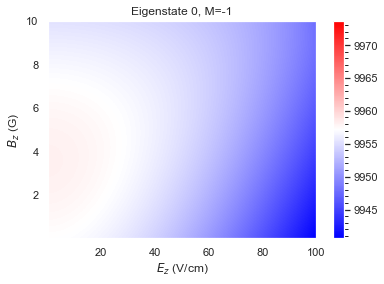

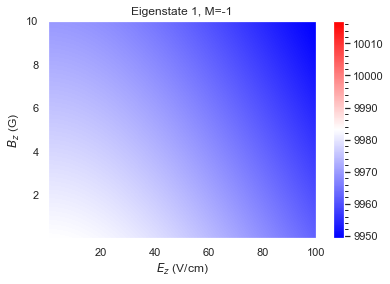

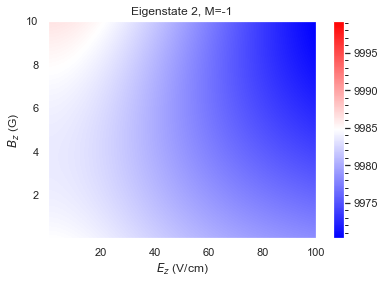

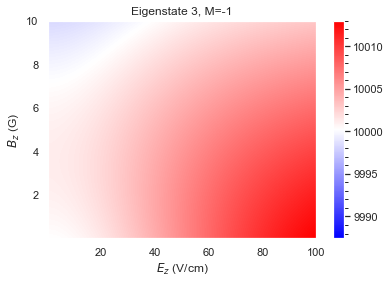

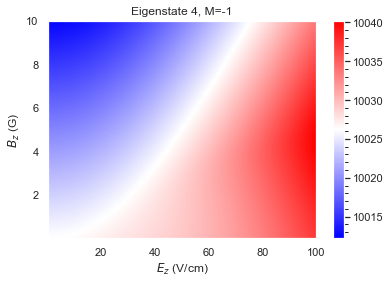

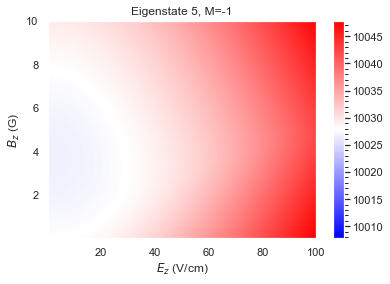

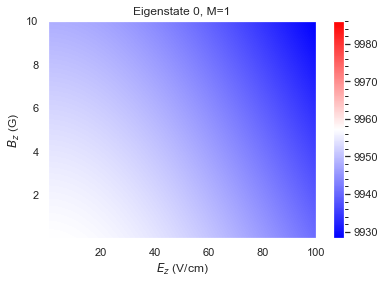

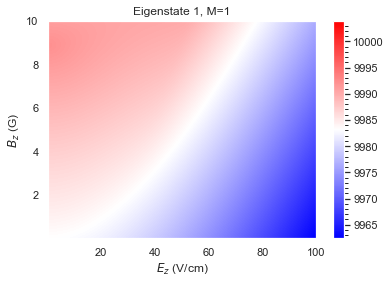

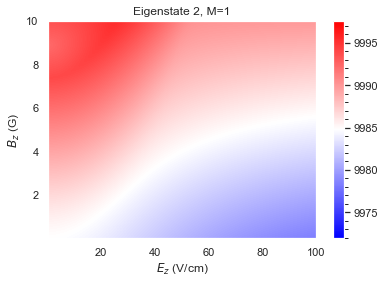

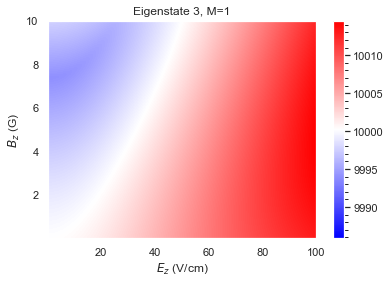

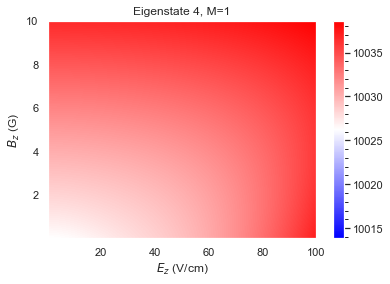

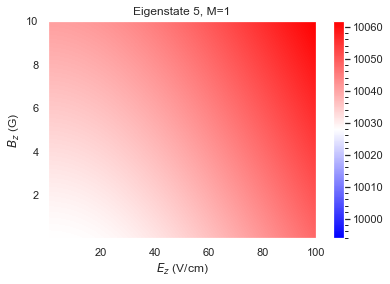

In [21]:
for M in eval_dict.keys():
    print(M)
    evals_EB = eval_dict[M][:,1:,:]
    
    for i in range(len(evals_EB)):
        plt.figure()
        E0 = evals_EB[i][0,0]
        max_delta = max(abs(evals_EB[i].max()-E0),abs(evals_EB[i].min()-E0))
        plt.grid(False)
        plt.pcolormesh(*mesh[:,1:,:],evals_EB[i],shading='auto',cmap='bwr',norm=TwoSlopeNorm(vcenter=E0,vmin=E0-max_delta,vmax=E0+max_delta))
        cbar = plt.colorbar()
        cbar.minorticks_on()
        plt.title('Eigenstate {}, M={}'.format(i,M))
        plt.xlabel(r'$E_z$ (V/cm)')
        plt.ylabel(r'$B_z$ (G)')

In [31]:
(Bz[-1]-Bz[-2])

0.019999999999999574

-1
1


C:\Users\ajadbaba\AppData\Local\Temp/ipykernel_29284/1849355173.py:13: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar()


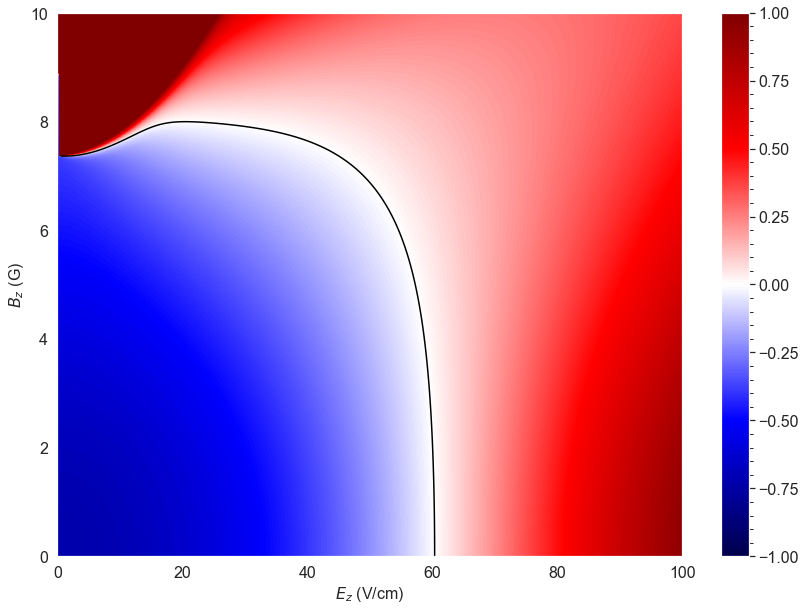

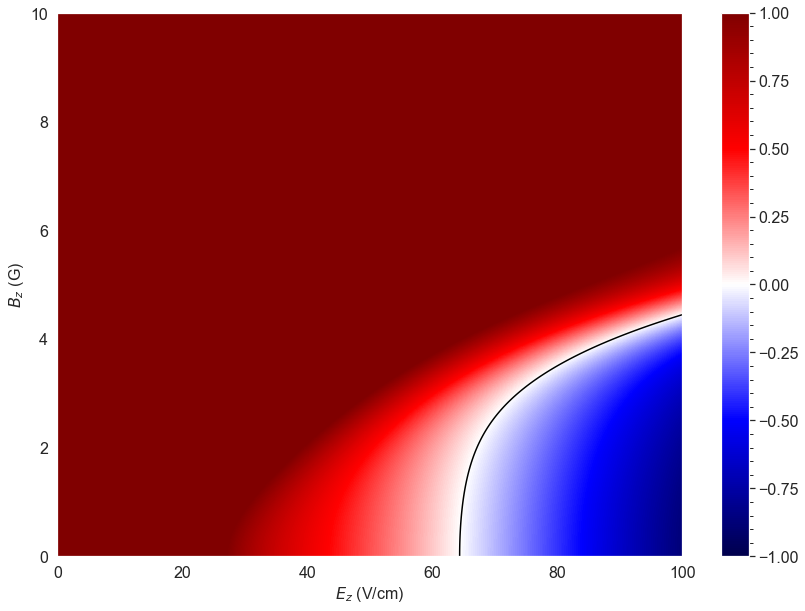

In [60]:
muBgS=1.399624494*2.0023/2
with_contour = True
for M in eval_dict.keys():
    print(M)
    if M!=1:
        continue
    evals_EB = eval_dict[M]-eval_dict[-M]
    for i in [3,4]:
        plt.figure(figsize=(14,10))
        geff = np.gradient(evals_EB[i])[1]/abs(Bz[-1]-Bz[-2])
        plt.grid(False)
        plt.pcolormesh(*mesh,geff/muBgS,shading='auto',cmap='seismic',norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))#,vmin=-1,vmax=1)
        cbar = plt.colorbar()
#         cbar.set_label(label=r'$\Delta g$',size=16,rotation=90)
        cbar.minorticks_on()
        cbar.ax.tick_params(labelsize=16)
        if with_contour:
            try:
                conmap = plt.contour(*mesh[:,10:,:],geff[10:,:]/muBgS,colors='black',levels=[0],vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
#                 plt.clabel(conmap, inline=True, fontsize=12)
    #             cbar = plt.colorbar()
    #             cbar.minorticks_on()
            except ValueError:
                print("Can't plot this data")
#         plt.title('Differential G-Factor'.format(i,M),fontsize=18)
        plt.xlabel(r'$E_z$ (V/cm)',fontsize=16)
        plt.ylabel(r'$B_z$ (G)',fontsize=16)
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)

In [53]:
for i in [3,4]:
    state_dict[1].write_state(i)
    print(state_dict[1].parities[i],'\n')

E = 10000.2226335463 MHz

 -0.7066014575 |K=-1,N=1,J=0.5,F=1.0,M=1.0> 

 -0.7066014575 |K=1,N=1,J=0.5,F=1.0,M=1.0> 

 0.0267278928 |K=-1,N=1,J=1.5,F=1.0,M=1.0> 

 0.0267278928 |K=1,N=1,J=1.5,F=1.0,M=1.0> 

1.0 

E = 10026.2273871203 MHz

 -0.0267278928 |K=-1,N=1,J=0.5,F=1.0,M=1.0> 

 -0.0267278928 |K=1,N=1,J=0.5,F=1.0,M=1.0> 

 -0.7066014575 |K=-1,N=1,J=1.5,F=1.0,M=1.0> 

 -0.7066014575 |K=1,N=1,J=1.5,F=1.0,M=1.0> 

1.0 



-1
1


C:\Users\ajadbaba\AppData\Local\Temp/ipykernel_29284/282809596.py:16: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar()


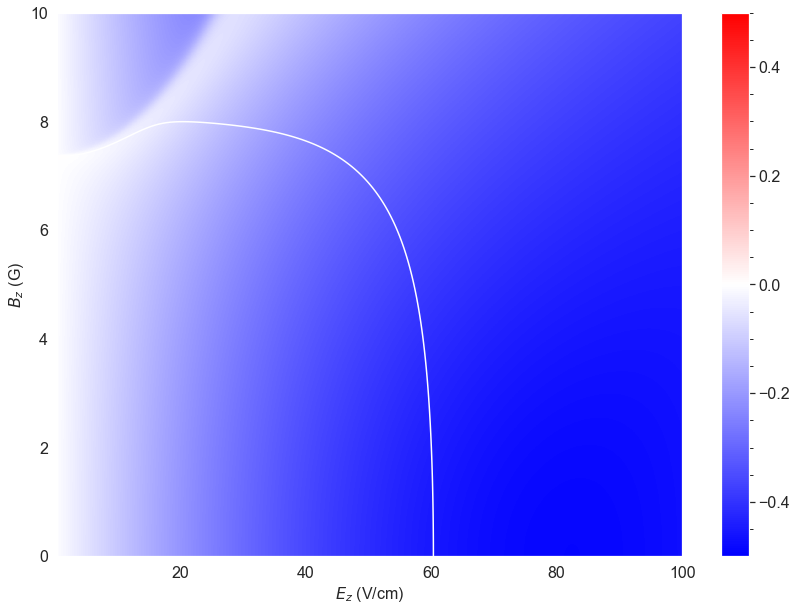

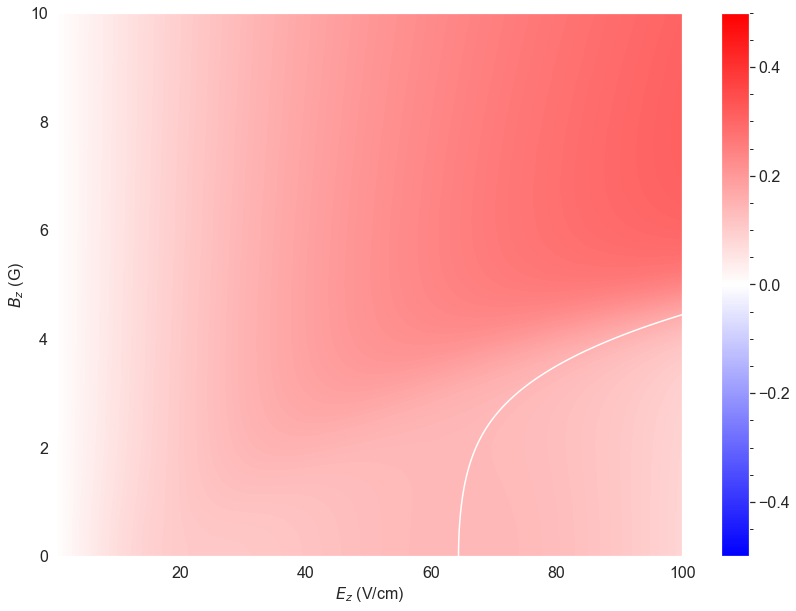

In [80]:
muBgS=1.399624494*2.0023/2
with_contour = True
for M in eval_dict.keys():
    print(M)
    if M!=1:
        continue
    PTV_EB = PTV_dict[M]-PTV_dict[-M]
    evals_EB = eval_dict[M]-eval_dict[-M]
    for i in [3,4]:
        plt.figure(figsize=(14,10))
        plt.grid(False)
        PTV = PTV_EB[i]
        geff = np.gradient(evals_EB[i])[1]/abs(Bz[-1]-Bz[-2])
        max_delta = max(abs(PTV[10:,:].max()),abs(PTV[10:,:].min()))
        plt.pcolormesh(*mesh[:,10:,:],PTV[10:,:],shading='auto',cmap='bwr',norm=TwoSlopeNorm(vmin=-1/2,vcenter=0,vmax=1/2))#,vmin=-1,vmax=1)
        cbar = plt.colorbar()
#         cbar.set_label(label=r'$\Delta g$',size=16,rotation=90)
        cbar.minorticks_on()
        cbar.ax.tick_params(labelsize=16)
        if with_contour:
            try:
                conmap = plt.contour(*mesh[:,10:,:],geff[10:,:]/muBgS,colors='white',levels=[0],vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
#                 plt.clabel(conmap, inline=True, fontsize=12)
    #             cbar = plt.colorbar()
    #             cbar.minorticks_on()
            except ValueError:
                print("Can't plot this data")
#         plt.title('Differential G-Factor'.format(i,M),fontsize=18)
        plt.xlabel(r'$E_z$ (V/cm)',fontsize=16)
        plt.ylabel(r'$B_z$ (G)',fontsize=16)
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)

-1
1


C:\Users\ajadbaba\AppData\Local\Temp/ipykernel_13244/1077831791.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar()


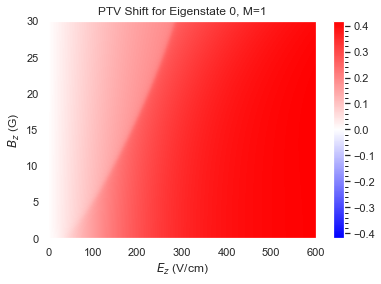

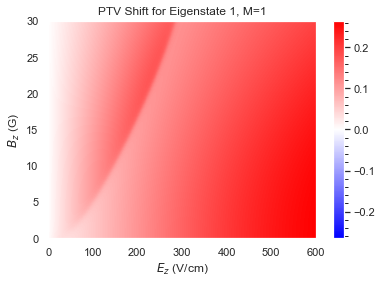

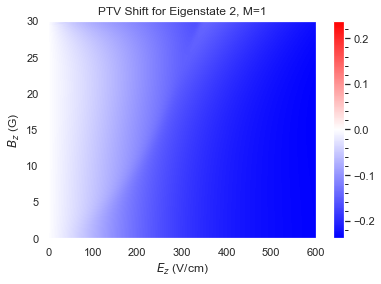

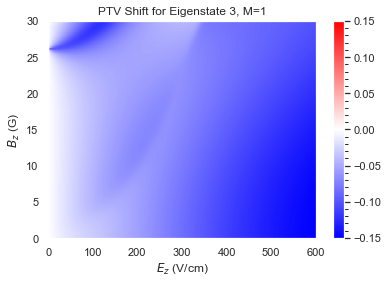

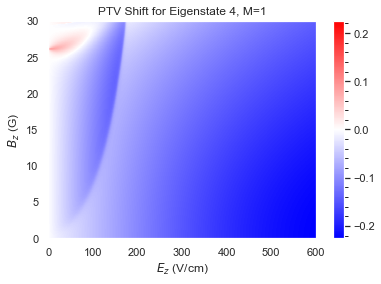

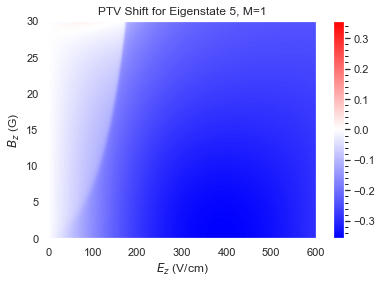

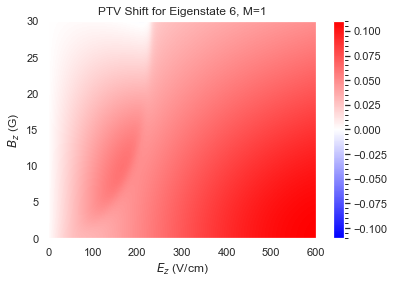

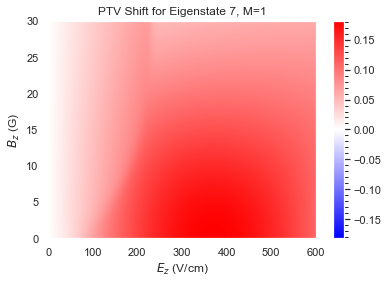

In [190]:
for M in eval_dict.keys():
    print(M)
    if M!=1:
        continue
    PTV_EB = PTV_dict[M]-PTV_dict[-M]
    for i in range(len(PTV_EB)):
        plt.figure()
        PTV = PTV_EB[i]
        max_delta = max(abs(PTV.max()),abs(PTV.min()))
        plt.grid(False)
        plt.pcolormesh(*mesh,PTV,shading='auto',cmap='bwr',norm=TwoSlopeNorm(vmin=-max_delta,vcenter=0,vmax=max_delta))
        cbar = plt.colorbar()
        cbar.minorticks_on()
        plt.title('PTV Shift for Eigenstate {}, M={}'.format(i,M))
        plt.xlabel(r'$E_z$ (V/cm)')
        plt.ylabel(r'$B_z$ (G)')

In [42]:
evals_EB.shape

(2, 1201, 1001)

In [159]:
np.searchsorted(Ez,390)

1950

In [164]:
np.argmin(abs(np.gradient(evals_EB[7])[1][:,0]))

2241

In [204]:
Ez = mesh[0,:,0]
Bz = mesh[1,0,:]

In [59]:
from scipy.optimize import curve_fit

def fitFunction(xscale,data,function,guess,sigma,plot,bounds=None):
    xscale = np.array(xscale)
    data = np.array(data)
    guess = np.array(guess).astype(float)
    if bounds==None:
        bounds = (-np.inf,np.inf)
    try:
        popt,pcov = curve_fit(function,xscale,data,p0=guess,sigma=sigma,bounds=bounds)
        perr = np.round(np.sqrt((np.diag(pcov))),decimals=6)
        params = np.round(popt,decimals=6)
        fit = function(xscale,*popt)
        residuals = data - fit
        if plot:
            plotFitComparison(xscale,data,function,params,sigma)
            plotFitResiduals(xscale,residuals,sigma)
    except RuntimeError:
        print("Error - curve_fit failed")
        print(guess)
        plt.figure()
        plt.plot(xscale,data)
        plt.plot(xscale,function(xscale,*guess))
        params = []
        perr = []
        residuals = []
    return [params,perr,residuals]

def plotFitComparison(xscale,data,function,params,sigma,xlabel=None,ylabel=None):
    plt.figure()
    plt.title('Fit vs Data')
    if sigma is None:
        plt.plot(xscale,data,label='Data',marker='o')
    else:
        plt.errorbar(xscale,data,yerr=sigma,label='Data',marker='o',linestyle='None')
    plt.plot(xscale,function(xscale,*params),label='Fit')
    return

def plotFitResiduals(xscale,residuals,sigma):
    plt.figure()
    plt.title('Fit Residuals')
    if sigma is None:
        plt.plot(xscale,residuals,'o',linestyle='None')
    else:
        plt.errorbar(xscale,residuals,yerr=sigma,marker='o',linestyle='None')
    plt.plot(xscale,np.zeros(len(xscale)),linestyle='--')
    return

def quadratic(x,a,b):
    return a*x**2+b

def line(x,m,b):
    return m*x+b

def fitQuad(xscale, data,guess=[1,0],sigma=None,plot=True,verbose=False):
    function = quadratic
    params,error,residuals = fitFunction(xscale,data,function,guess,sigma,plot)
    if verbose:
        print('a = {} +/- {}'.format(params[0],error[0]))
        print('b = {} +/- {}'.format(params[1],error[1]))
    return [params,error,residuals]

def fitLine(xscale, data,guess=[1,0],sigma=None,plot=True,verbose=False):
    function = line
    params,error,residuals = fitFunction(xscale,data,function,guess,sigma,plot)
    if verbose:
        print('m = {} +/- {}'.format(params[0],error[0]))
        print('b = {} +/- {}'.format(params[1],error[1]))
    return [params,error,residuals]

a = 0.00229 +/- 0.0
b = 0.000152 +/- 0.0


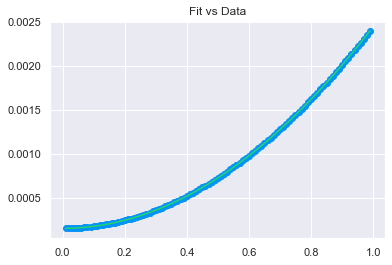

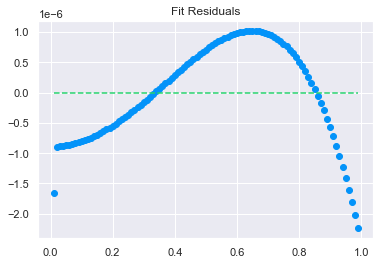

In [58]:
params,err,resid = fitQuad(Bz[1:100],(np.gradient(EB)[1][iE,1:100])/(Bz[-1]-Bz[-2]),verbose=True)

-1
1
64.35000000000001


Text(0.5, 1.0, 'Differential g-Factor, N=1,J=1/2+ M=1/-1')

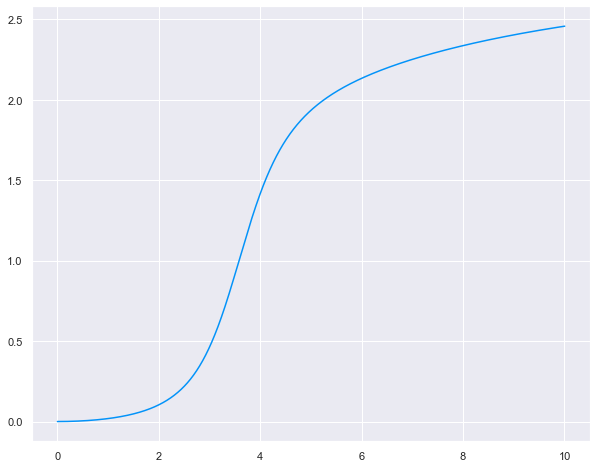

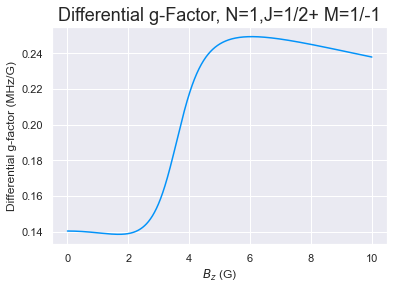

In [83]:
plt.figure(figsize=(10,8))
for M in eval_dict.keys():
    print(M)
    if M!=1:
        continue
    evals_EB = eval_dict[M]-eval_dict[-M]
    PTV_EB = PTV_dict[M] - PTV_dict[-M]
    for i in range(len(evals_EB)):
        if i not in [4]:
            continue
        EB = evals_EB[i]
        iE = np.argmin(abs(np.gradient(EB)[1][:,0]))
        print(Ez[iE])
        plt.plot(Bz,np.gradient(EB)[1][iE,:]/(Bz[-1]-Bz[-2]))
        plt.figure()
        plt.plot(Bz,PTV_EB[i][iE,:])
#         plt.xlabel(r'$E_z$ (V/cm)')
plt.xlabel(r'$B_z$ (G)')
plt.ylabel('Differential g-factor (MHz/G)')
plt.title('Differential g-Factor, N=1,J=1/2+ M=1/-1',fontsize=18)

m = 0.031909 +/- 5e-06
b = -1.939903 +/- 0.000286


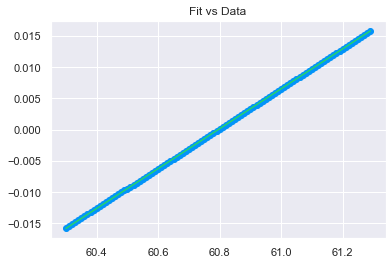

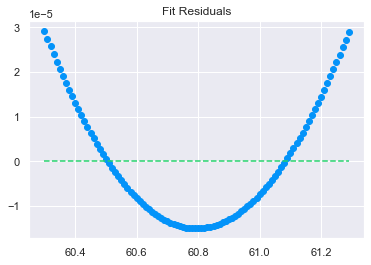

In [61]:
params,err,resid = fitLine(Ez[iE-50:iE+50],(np.gradient(EB)[1][iE-50:iE+50,0])/(Bz[-1]-Bz[-2]),verbose=True)

-1
1
60.79999999999586
Slope = 0.031908400342224676 /(V/cm)


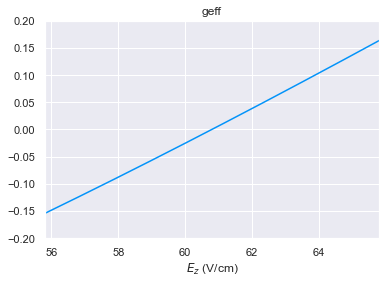

In [46]:
plt.figure()
for M in eval_dict.keys():
    print(M)
    if M!=1:
        continue
    evals_EB = eval_dict[M]-eval_dict[-M]
    for i in range(len(evals_EB)):
        if i not in [3]:
            continue
        EB = evals_EB[i]
        iE = np.argmin(abs(np.gradient(EB)[1][:,0]))
        print(Ez[iE])
        plt.plot(Ez,np.gradient(EB)[1][:,0]/(Bz[-1]-Bz[-2]))
#         plt.xlabel(r'$E_z$ (V/cm)')
plt.xlabel(r'$E_z$ (V/cm)')
plt.title('geff')
plt.xlim(55.8,65.8)
plt.ylim(-0.2,0.2)
slope = ((np.gradient(EB)[1][iE+100,0]-np.gradient(EB)[1][iE-100,0])/(Bz[-1]-Bz[-2]))/(Ez[iE+100]-Ez[iE-100])
print('Slope =',slope,'/(V/cm)')

In [42]:
((np.gradient(EB)[1][iE+100,0]-np.gradient(EB)[1][iE-100,0])/(Bz[-1]-Bz[-2]))/(Ez[iE+100]-Ez[iE-100])

0.031908400342224676

In [57]:
np.gradient(EB)[0].shape

(1201, 1001)

In [96]:
eval_dict[0][3]-eval_dict[0][4]

array([[-15.94271, -15.94267, -15.94257, ..., -11.09706, -11.12208,
        -11.1471 ],
       [-15.94304, -15.943  , -15.9429 , ..., -11.09697, -11.12198,
        -11.147  ],
       [-15.94403, -15.944  , -15.9439 , ..., -11.09667, -11.12169,
        -11.14671],
       ...,
       [-40.21951, -40.21936, -40.21894, ..., -12.61294, -12.64068,
        -12.66841],
       [-40.21984, -40.2197 , -40.21928, ..., -12.61309, -12.64083,
        -12.66857],
       [-40.22018, -40.22004, -40.21962, ..., -12.61325, -12.64098,
        -12.66872]])

In [164]:
d = eval_dict[0][3]-eval_dict[0][4]
(abs(d)<0.1).any()

True

In [141]:
x = np.zeros((100,100))
y = np.zeros((100,100))+1
y[3:5,20:80] = 1

In [142]:
d = x-y
testmesh = np.array(np.meshgrid(np.arange(100),np.arange(100),indexing='ij'))

C:\Users\ajadbaba\AppData\Local\Temp/ipykernel_17868/1015796236.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar()


Text(0, 0.5, '$B_z$ (G)')

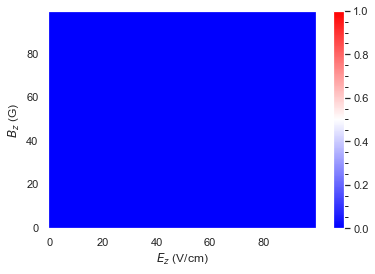

In [143]:
plt.figure()
plt.grid(False)
plt.pcolormesh(*testmesh,abs(d)<0.1,shading='auto',cmap='bwr',vmin=0,vmax=1)
cbar = plt.colorbar()
cbar.minorticks_on()
plt.xlabel(r'$E_z$ (V/cm)')
plt.ylabel(r'$B_z$ (G)')

In [154]:
(abs(d)<0.1).nonzero()[0].size

0

In [158]:
len(eval_dict.keys())

5

In [64]:
E_thresh = 0.1
PTV_thresh = 0.05
geff_thresh = 0.1
Ez_idx_match = []
Bz_idx_match = []
eigenstate_match = []
M_match = []
M_list = list(eval_dict.keys())
for Midx in range(len(M_list)):
    Mi = M_list[Midx]
    for Mjdx in range(Midx,len(M_list)):
        Mj = M_list[Mjdx]
        if abs(Mi-Mj)>2:
            continue
        else:
            evals_Mi = eval_dict[Mi]
            evals_Mj = eval_dict[Mj]
            PTV_Mi = PTV_dict[Mi]
            PTV_Mj = PTV_dict[Mj]
            for i in range(len(evals_Mi)):
                for j in range(i,len(evals_Mj)):
                    if i==j and Mi==Mj:
                        continue
                    deltaE_ij = evals_Mi[i]-evals_Mj[j]
                    E_bool_match = (abs(deltaE_ij)<E_thresh)
                    if E_bool_match.any():
                        geff_i = np.gradient(evals_Mi[i])[1]/(Bz[1]-Bz[0])
                        geff_j = np.gradient(evals_Mj[j])[1]/(Bz[1]-Bz[0])
                        deltag_ij = geff_i - geff_j
                        g_bool_match = np.logical_and(abs(deltag_ij)<geff_thresh, E_bool_match)
                        if g_bool_match.any():
                            PTV_i = PTV_Mi[i]
                            PTV_j = PTV_Mj[j]
                            deltaPTV_ij = PTV_i - PTV_j
                            PTV_bool_match = np.logical_and(abs(deltaPTV_ij)>PTV_thresh, g_bool_match)
                            if PTV_bool_match.any():
                                #Found a match!
                                idx_match = PTV_bool_match.nonzero()
                                print('Found a match!')
                                print('i = {}, Mi = {}'.format(i,Mi))
                                print('j = {}, Mj = {}'.format(j,Mj))
                                print('Ez vals = {}'.format(Ez[idx_match[0]]))
                                print('Bz vals = {}'.format(Bz[idx_match[1]]))
                                print('delta geff = {}'.format(deltag_ij[idx_match]))
                                print('delta PTV = {}'.format(deltaPTV_ij[idx_match]))
                                Ez_idx_match.append(idx_match[0])
                                Bz_idx_match.append(idx_match[1])
                                eigenstate_match.append([i,j])
                                M_match.append([Mi,Mj])

Found a match!
i = 3, Mi = -1
j = 3, Mj = 1
Ez vals = [57.05 57.05 57.05 ... 63.45 63.45 63.45]
Bz vals = [0.79  0.795 0.8   ... 0.99  0.995 1.   ]
delta geff = [ 0.09998  0.09994  0.0999  ... -0.09975 -0.09976 -0.09976]
delta PTV = [0.44084 0.44082 0.4408  ... 0.46029 0.46026 0.46023]
Found a match!
i = 4, Mi = -1
j = 4, Mj = 1
Ez vals = [61.5 61.5 61.5 ... 67.6 67.6 67.6]
Bz vals = [0.    0.005 0.01  ... 0.9   0.905 0.91 ]
delta geff = [-0.09967 -0.09967 -0.09967 ...  0.09994  0.09977  0.09959]
delta PTV = [-0.1396  -0.1396  -0.1396  ... -0.13918 -0.13918 -0.13917]
Found a match!
i = 1, Mi = 1
j = 2, Mj = 1
Ez vals = [0.35 0.4  0.45]
Bz vals = [8.89 8.89 8.89]
delta geff = [-0.09003 -0.07541 -0.06353]
delta PTV = [-0.42648 -0.42658 -0.42664]


C:\Users\ajadbaba\AppData\Local\Temp/ipykernel_29284/2138494393.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar()
C:\Users\ajadbaba\AppData\Local\Temp/ipykernel_29284/2138494393.py:32: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar()


Text(0, 0.5, '$B_z$ (G)')

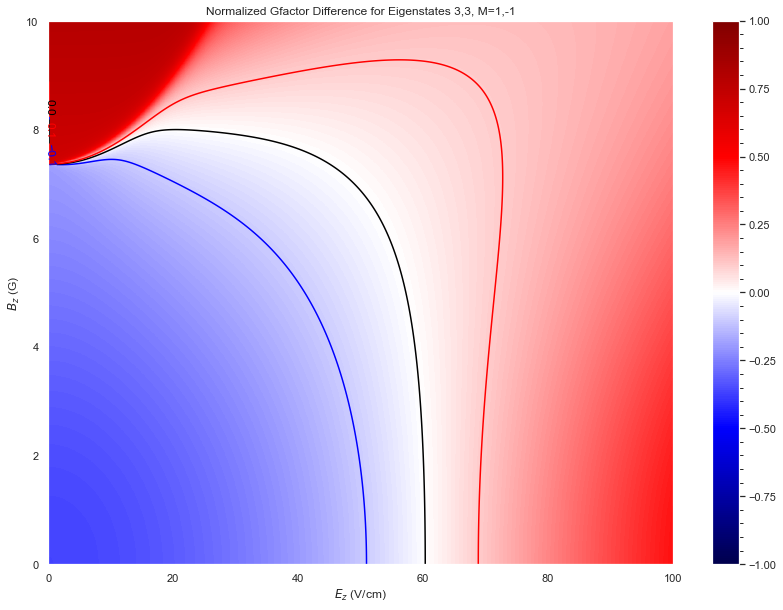

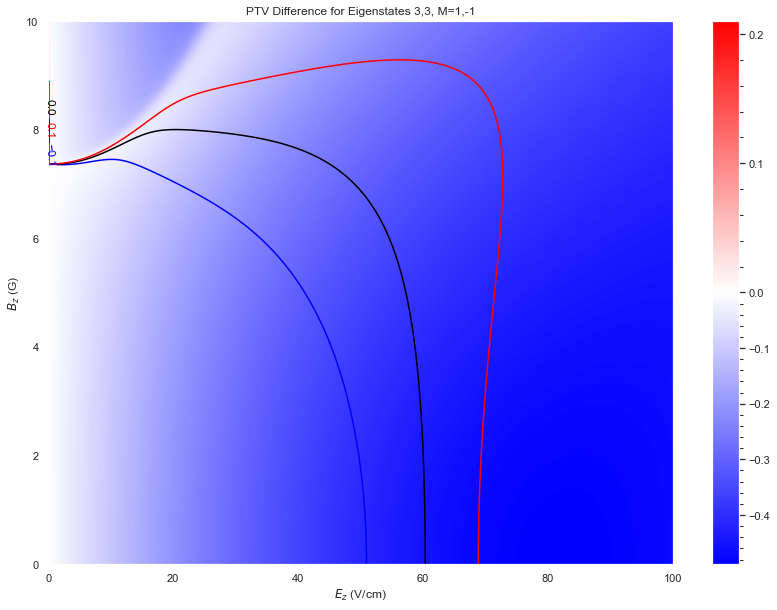

In [65]:
muBgS=1.399624494*2.0023/2
with_contour = True
idx = 3
evals_1 = eval_dict[1][idx]
evals_2 = eval_dict[-1][idx]
plt.figure(figsize=(14,10))
geff_1 = np.gradient(evals_1)[1]/(Bz[1]-Bz[0])
geff_2 = np.gradient(evals_2)[1]/(Bz[1]-Bz[0])
delta_geff = geff_1 - geff_2
plt.grid(False)
plt.pcolormesh(*mesh,delta_geff/(2*muBgS),shading='auto',cmap='seismic',vmin=-1,vmax=1)
cbar = plt.colorbar()
cbar.minorticks_on()
if with_contour:
    try:
        conmap = plt.contour(*mesh,delta_geff/(2*muBgS),colors=['blue','black','red'],levels=[-0.1,0,0.1],vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
        plt.clabel(conmap, inline=True, fontsize=12)
#             cbar = plt.colorbar()
#             cbar.minorticks_on()
    except ValueError:
        print("Can't plot this data")
plt.title('Normalized Gfactor Difference for Eigenstates {},{}, M=1,-1'.format(idx,idx))
plt.xlabel(r'$E_z$ (V/cm)')
plt.ylabel(r'$B_z$ (G)')

PTV_1 = PTV_dict[1][idx]
PTV_2 = PTV_dict[-1][idx]
plt.figure(figsize=(14,10))
delta_PTV = PTV_1 - PTV_2
plt.grid(False)
plt.pcolormesh(*mesh,delta_PTV,shading='auto',cmap='bwr',norm=TwoSlopeNorm(vcenter=0.0))
cbar = plt.colorbar()
cbar.minorticks_on()
if with_contour:
    try:
        conmap = plt.contour(*mesh,delta_geff/(2*muBgS),colors=['blue','black','red'],levels=[-0.1,0,0.1],vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
        plt.clabel(conmap, inline=True, fontsize=12)
#             cbar = plt.colorbar()
#             cbar.minorticks_on()
    except ValueError:
        print("Can't plot this data")
plt.title('PTV Difference for Eigenstates {},{}, M=1,-1'.format(idx,idx))
plt.xlabel(r'$E_z$ (V/cm)')
plt.ylabel(r'$B_z$ (G)')

C:\Users\ajadbaba\AppData\Local\Temp/ipykernel_17868/1155249723.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar()
C:\Users\ajadbaba\AppData\Local\Temp/ipykernel_17868/1155249723.py:32: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar()


Text(0, 0.5, '$B_z$ (G)')

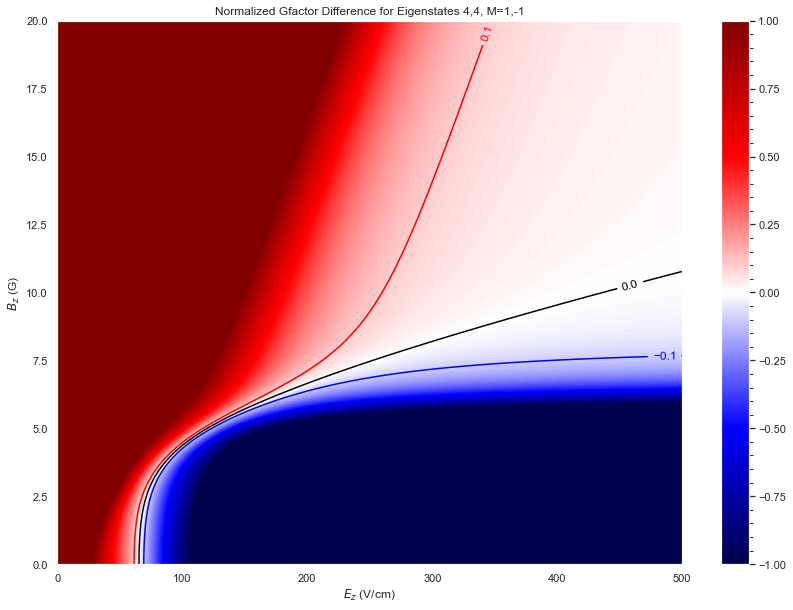

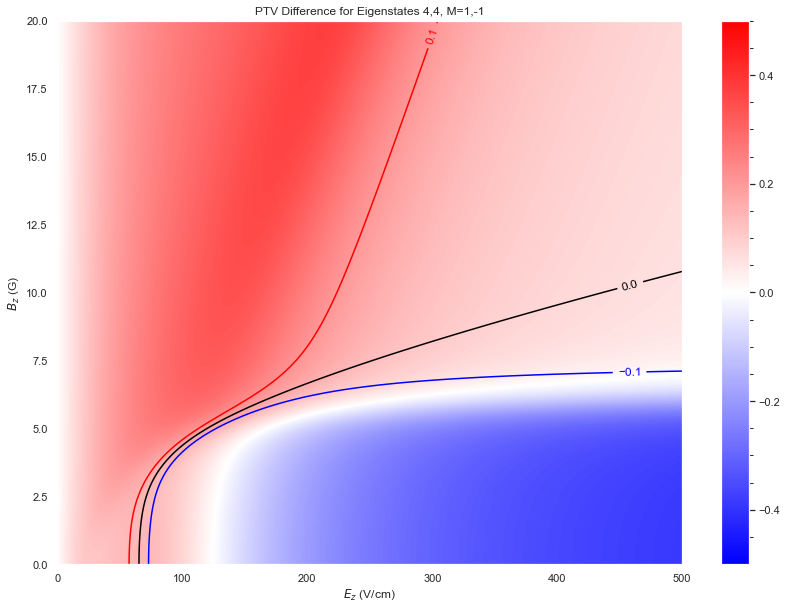

In [372]:
muBgS=1.399624494*2.0023/2
with_contour = True
idx = 4
evals_1 = eval_dict[1][idx]
evals_2 = eval_dict[-1][idx]
plt.figure(figsize=(14,10))
geff_1 = np.gradient(evals_1)[1]/(Bz[1]-Bz[0])
geff_2 = np.gradient(evals_2)[1]/(Bz[1]-Bz[0])
delta_geff = geff_1 - geff_2
plt.grid(False)
plt.pcolormesh(*mesh,delta_geff/muBgS,shading='auto',cmap='seismic',vmin=-1,vmax=1)
cbar = plt.colorbar()
cbar.minorticks_on()
if with_contour:
    try:
        conmap = plt.contour(*mesh,delta_geff/muBgS,colors=['blue','black','red'],levels=[-0.1,0,0.1],vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
        plt.clabel(conmap, inline=True, fontsize=12)
#             cbar = plt.colorbar()
#             cbar.minorticks_on()
    except ValueError:
        print("Can't plot this data")
plt.title('Normalized Gfactor Difference for Eigenstates {},{}, M=1,-1'.format(idx,idx))
plt.xlabel(r'$E_z$ (V/cm)')
plt.ylabel(r'$B_z$ (G)')

PTV_1 = PTV_dict[1][idx]
PTV_2 = PTV_dict[-1][idx]
plt.figure(figsize=(14,10))
delta_PTV = PTV_1 - PTV_2
plt.grid(False)
plt.pcolormesh(*mesh,delta_PTV,shading='auto',cmap='bwr',vmin=-0.5,vmax=0.5)
cbar = plt.colorbar()
cbar.minorticks_on()
if with_contour:
    try:
        conmap = plt.contour(*mesh,delta_geff/(2*muBgS),colors=['blue','black','red'],levels=[-0.1,0,0.1],vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
        plt.clabel(conmap, inline=True, fontsize=12)
#             cbar = plt.colorbar()
#             cbar.minorticks_on()
    except ValueError:
        print("Can't plot this data")
plt.title('PTV Difference for Eigenstates {},{}, M=1,-1'.format(idx,idx))
plt.xlabel(r'$E_z$ (V/cm)')
plt.ylabel(r'$B_z$ (G)')

In [270]:
Em = np.searchsorted(Ez,40)
Em

160

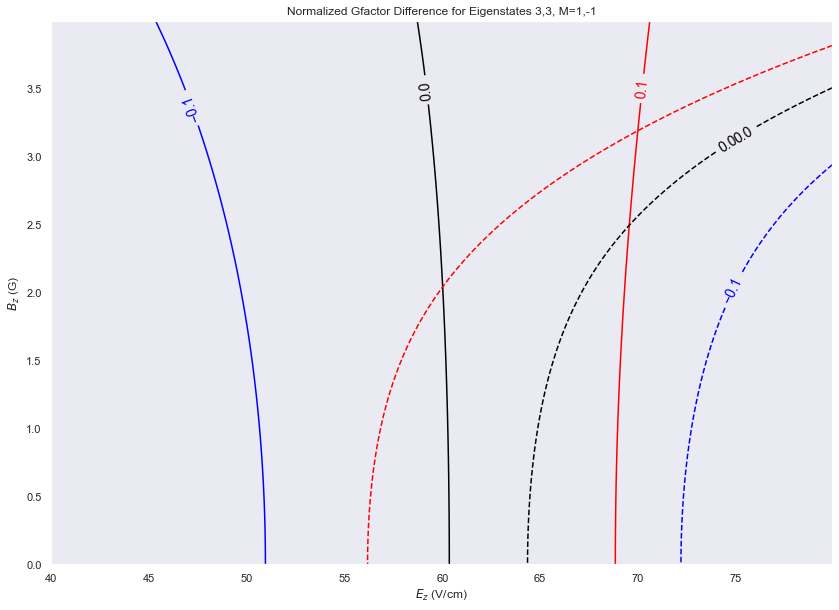

In [69]:
El = np.searchsorted(Ez,40)
Eu = np.searchsorted(Ez,80)
Bl = np.searchsorted(Bz,0)
Bu = np.searchsorted(Bz,4)
s1 = slice(El,Eu)
s2 = slice(Bl,Bu)


muBgS=1.399624494*2.0023/2
with_contour = True
idx = 3
evals_1 = eval_dict[1][idx]
evals_2 = eval_dict[-1][idx]
plt.figure(figsize=(14,10))
geff_1 = np.gradient(evals_1)[1]/(Bz[1]-Bz[0])
geff_2 = np.gradient(evals_2)[1]/(Bz[1]-Bz[0])
delta_geff = geff_1 - geff_2
plt.grid(False)
# plt.pcolormesh(*mesh,delta_geff/muBgS,shading='auto',cmap='seismic',vmin=-1,vmax=1)
# cbar = plt.colorbar()
# cbar.minorticks_on()
if with_contour:
    try:
        conmap1 = plt.contour(*mesh[:,s1,s2],delta_geff[s1,s2]/muBgS/2,colors=['blue','black','red'],levels=[-0.1,0,0.1],vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
        plt.clabel(conmap1, inline=True,inline_spacing=5, fontsize=14,rightside_up=False,manual=[(50,3.5),(60,3.5),(70,3.5)])
#             cbar = plt.colorbar()
#             cbar.minorticks_on()
    except ValueError:
        print("Can't plot this data")
plt.title('Normalized Gfactor Difference for Eigenstates {},{}, M=1,-1'.format(idx,idx))
plt.xlabel(r'$E_z$ (V/cm)')
plt.ylabel(r'$B_z$ (G)')

idx = 4
evals_1 = eval_dict[1][idx]
evals_2 = eval_dict[-1][idx]
geff_1 = np.gradient(evals_1)[1]/(Bz[1]-Bz[0])
geff_2 = np.gradient(evals_2)[1]/(Bz[1]-Bz[0])
delta_geff = geff_1 - geff_2
plt.grid(False)
# plt.pcolormesh(*mesh,delta_geff/muBgS,shading='auto',cmap='seismic',vmin=-1,vmax=1)
# cbar = plt.colorbar()
# cbar.minorticks_on()
if with_contour:
    try:
        conmap2 = plt.contour(*mesh[:,s1,s2],delta_geff[s1,s2]/muBgS/2,colors=['blue','black','red'],linestyles='dashed',levels=[-0.1,0,0.1],vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
        plt.clabel(conmap2,inline=True,inline_spacing=5,fontsize=14,rightside_up=True,manual=[(75,3.25),(75,3),(75,2)])
#             cbar = plt.colorbar()
#             cbar.minorticks_on()
    except ValueError:
        print("Can't plot this data")

In [70]:
np.linspace(-0.1,0.1,21)

array([-0.1 , -0.09, -0.08, -0.07, -0.06, -0.05, -0.04, -0.03, -0.02,
       -0.01,  0.  ,  0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,
        0.08,  0.09,  0.1 ])

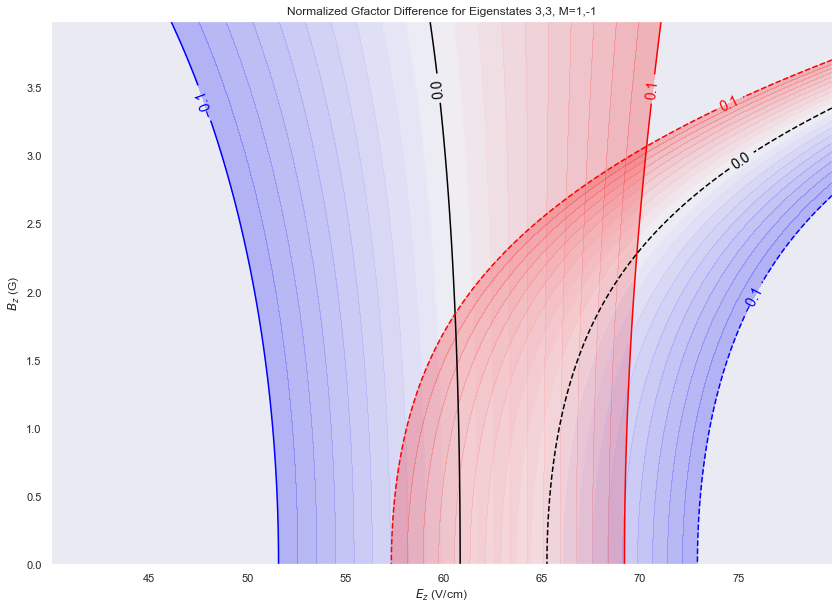

In [393]:
El = np.searchsorted(Ez,40)
Eu = np.searchsorted(Ez,80)
Bl = np.searchsorted(Bz,0)
Bu = np.searchsorted(Bz,4)
s1 = slice(El,Eu)
s2 = slice(Bl,Bu)


muBgS=1.399624494*2.0023/2
with_contour = True
idx = 3
evals_1 = eval_dict[1][idx]
evals_2 = eval_dict[-1][idx]
plt.figure(figsize=(14,10))
geff_1 = np.gradient(evals_1)[1]/(Bz[1]-Bz[0])
geff_2 = np.gradient(evals_2)[1]/(Bz[1]-Bz[0])
delta_geff = geff_1 - geff_2
plt.grid(False)
# PTV_1 = PTV_dict[1][idx]
# PTV_2 = PTV_dict[-1][idx]
# delta_PTV = PTV_1 - PTV_2
# plt.contourf(*mesh[:,s1,s2],delta_PTV[s1,s2],levels=10,cmap='cool')
# cbar = plt.colorbar()
# cbar.minorticks_on()
if with_contour:
    try:
        conmap1 = plt.contour(*mesh[:,s1,s2],delta_geff[s1,s2]/muBgS/2,colors=['blue','black','red'],levels=[-0.1,0,0.1],vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
        plt.clabel(conmap1, inline=True,inline_spacing=5,manual=[(50,3.5),(60,3.5),(70,3.5)], fontsize=14,rightside_up=False)
        smallmap1 = plt.contourf(*mesh[:,s1,s2],delta_geff[s1,s2]/muBgS/2,cmap='bwr',levels=np.linspace(-0.1,0.1,21),alpha=0.25,vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
#             cbar = plt.colorbar()
#             cbar.minorticks_on()
    except ValueError:
        print("Can't plot this data")
plt.title('Normalized Gfactor Difference for Eigenstates {},{}, M=1,-1'.format(idx,idx))
plt.xlabel(r'$E_z$ (V/cm)')
plt.ylabel(r'$B_z$ (G)')

idx = 4
evals_1 = eval_dict[1][idx]
evals_2 = eval_dict[-1][idx]
geff_1 = np.gradient(evals_1)[1]/(Bz[1]-Bz[0])
geff_2 = np.gradient(evals_2)[1]/(Bz[1]-Bz[0])
delta_geff = geff_1 - geff_2
plt.grid(False)
# plt.pcolormesh(*mesh,delta_geff/muBgS,shading='auto',cmap='seismic',vmin=-1,vmax=1)
# cbar = plt.colorbar()
# cbar.minorticks_on()
if with_contour:
    try:
        conmap2 = plt.contour(*mesh[:,s1,s2],delta_geff[s1,s2]/muBgS/2,colors=['blue','black','red'],linestyles='dashed',levels=[-0.1,0,0.1],vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
        plt.clabel(conmap2,inline=True,inline_spacing=5, manual=[(75,3.25),(75,3),(75,2)],fontsize=14,rightside_up=True)
        smallmap2 = plt.contourf(*mesh[:,s1,s2],delta_geff[s1,s2]/muBgS/2,cmap='bwr',linestyles='dashed',levels=np.linspace(-0.1,0.1,21),alpha=0.25,vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
#             cbar = plt.colorbar()
#             cbar.minorticks_on()
    except ValueError:
        print("Can't plot this data")

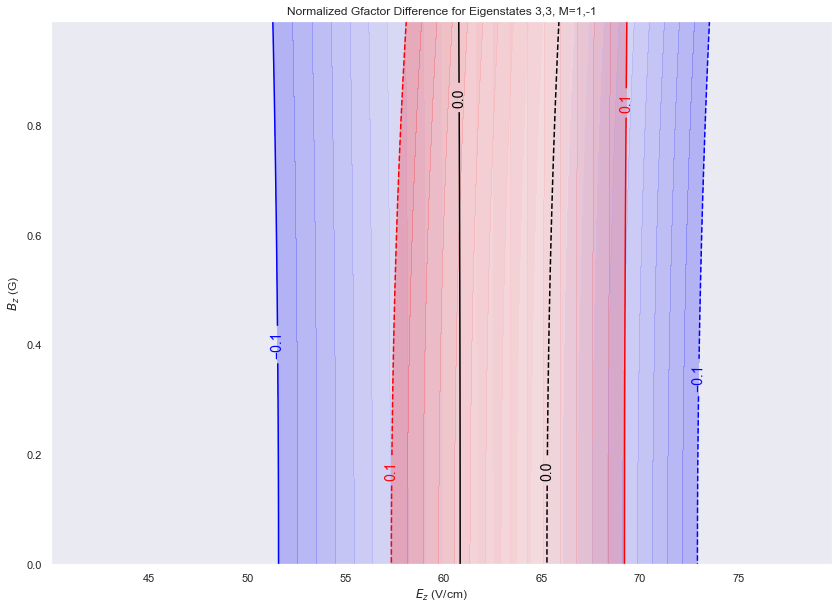

In [394]:
El = np.searchsorted(Ez,40)
Eu = np.searchsorted(Ez,80)
Bl = np.searchsorted(Bz,0)
Bu = np.searchsorted(Bz,1)
s1 = slice(El,Eu)
s2 = slice(Bl,Bu)


muBgS=1.399624494*2.0023/2
with_contour = True
idx = 3
evals_1 = eval_dict[1][idx]
evals_2 = eval_dict[-1][idx]
plt.figure(figsize=(14,10))
geff_1 = np.gradient(evals_1)[1]/(Bz[1]-Bz[0])
geff_2 = np.gradient(evals_2)[1]/(Bz[1]-Bz[0])
delta_geff = geff_1 - geff_2
plt.grid(False)
# PTV_1 = PTV_dict[1][idx]
# PTV_2 = PTV_dict[-1][idx]
# delta_PTV = PTV_1 - PTV_2
# plt.contourf(*mesh[:,s1,s2],delta_PTV[s1,s2],levels=10,cmap='cool')
# cbar = plt.colorbar()
# cbar.minorticks_on()
if with_contour:
    try:
        conmap1 = plt.contour(*mesh[:,s1,s2],delta_geff[s1,s2]/muBgS/2,colors=['blue','black','red'],levels=[-0.1,0,0.1],vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
        plt.clabel(conmap1, inline=True,inline_spacing=5, fontsize=14,rightside_up=False)
        smallmap1 = plt.contourf(*mesh[:,s1,s2],delta_geff[s1,s2]/muBgS/2,cmap='bwr',levels=np.linspace(-0.1,0.1,21),alpha=0.25,vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
#             cbar = plt.colorbar()
#             cbar.minorticks_on()
    except ValueError:
        print("Can't plot this data")
plt.title('Normalized Gfactor Difference for Eigenstates {},{}, M=1,-1'.format(idx,idx))
plt.xlabel(r'$E_z$ (V/cm)')
plt.ylabel(r'$B_z$ (G)')

idx = 4
evals_1 = eval_dict[1][idx]
evals_2 = eval_dict[-1][idx]
geff_1 = np.gradient(evals_1)[1]/(Bz[1]-Bz[0])
geff_2 = np.gradient(evals_2)[1]/(Bz[1]-Bz[0])
delta_geff = geff_1 - geff_2
plt.grid(False)
# plt.pcolormesh(*mesh,delta_geff/muBgS,shading='auto',cmap='seismic',vmin=-1,vmax=1)
# cbar = plt.colorbar()
# cbar.minorticks_on()
if with_contour:
    try:
        conmap2 = plt.contour(*mesh[:,s1,s2],delta_geff[s1,s2]/muBgS/2,colors=['blue','black','red'],linestyles='dashed',levels=[-0.1,0,0.1],vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
        plt.clabel(conmap2,inline=True,inline_spacing=5,fontsize=14,rightside_up=True)
        smallmap2 = plt.contourf(*mesh[:,s1,s2],delta_geff[s1,s2]/muBgS/2,cmap='bwr',linestyles='dashed',levels=np.linspace(-0.1,0.1,21),alpha=0.25,vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
#             cbar = plt.colorbar()
#             cbar.minorticks_on()
    except ValueError:
        print("Can't plot this data")

C:\Users\ajadbaba\AppData\Local\Temp/ipykernel_17868/3213161298.py:42: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar()


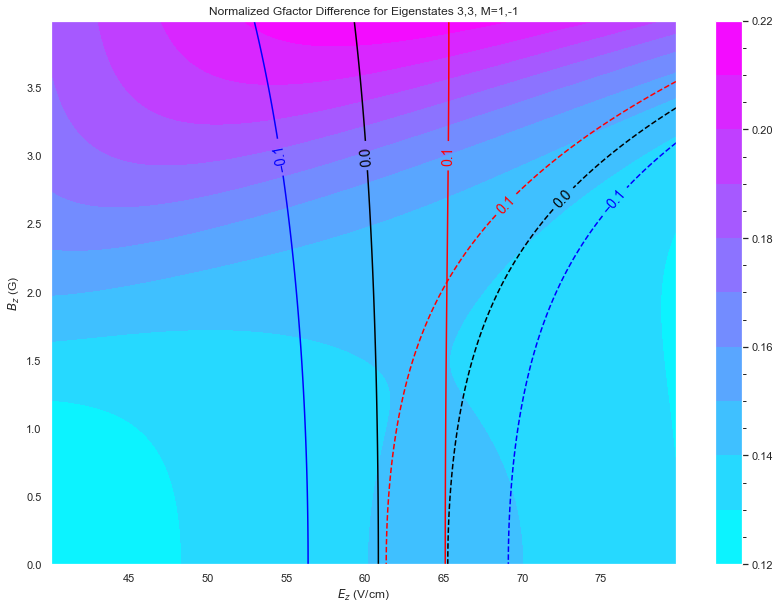

In [305]:
El = np.searchsorted(Ez,40)
Eu = np.searchsorted(Ez,80)
Bl = np.searchsorted(Bz,0)
Bu = np.searchsorted(Bz,4)
s1 = slice(El,Eu)
s2 = slice(Bl,Bu)


muBgS=1.399624494*2.0023/2
with_contour = True
idx = 3
evals_1 = eval_dict[1][idx]
evals_2 = eval_dict[-1][idx]
plt.figure(figsize=(14,10))
geff_1 = np.gradient(evals_1)[1]/(Bz[1]-Bz[0])
geff_2 = np.gradient(evals_2)[1]/(Bz[1]-Bz[0])
delta_geff = geff_1 - geff_2
plt.grid(False)
if with_contour:
    try:
        conmap1 = plt.contour(*mesh[:,s1,s2],delta_geff[s1,s2]/muBgS,colors=['blue','black','red'],levels=[-0.1,0,0.1],vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
        plt.clabel(conmap1, inline=True,inline_spacing=5,manual=[(55,3),(60,3),(65,3)], fontsize=14,rightside_up=False)
#             cbar = plt.colorbar()
#             cbar.minorticks_on()
    except ValueError:
        print("Can't plot this data")
plt.title('Normalized Gfactor Difference for Eigenstates {},{}, M=1,-1'.format(idx,idx))
plt.xlabel(r'$E_z$ (V/cm)')
plt.ylabel(r'$B_z$ (G)')

idx = 4
evals_1 = eval_dict[1][idx]
evals_2 = eval_dict[-1][idx]
geff_1 = np.gradient(evals_1)[1]/(Bz[1]-Bz[0])
geff_2 = np.gradient(evals_2)[1]/(Bz[1]-Bz[0])
delta_geff = geff_1 - geff_2
plt.grid(False)
PTV_1 = PTV_dict[1][idx]
PTV_2 = PTV_dict[-1][idx]
delta_PTV = PTV_1 - PTV_2
plt.contourf(*mesh[:,s1,s2],delta_PTV[s1,s2],levels=10,cmap='cool')
cbar = plt.colorbar()
cbar.minorticks_on()
# plt.pcolormesh(*mesh,delta_geff/muBgS,shading='auto',cmap='seismic',vmin=-1,vmax=1)
# cbar = plt.colorbar()
# cbar.minorticks_on()
if with_contour:
    try:
        conmap2 = plt.contour(*mesh[:,s1,s2],delta_geff[s1,s2]/muBgS,colors=['blue','black','red'],linestyles='dashed',levels=[-0.1,0,0.1],vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
        plt.clabel(conmap2,inline=True,inline_spacing=5, manual=[(68,2.75),(72,2.75),(75,2.75)],fontsize=14,rightside_up=True)
#             cbar = plt.colorbar()
#             cbar.minorticks_on()
    except ValueError:
        print("Can't plot this data")